### Total capacity estimation for BEV cases 2 and 3
This notebook implements the different total-capacity estimation methods for the BEV case 2 and 3 scenarios in lesson 4.4.5. 

In [1]:
% Note that xLSalgos.m is stored in the "readonly" path
addpath readonly

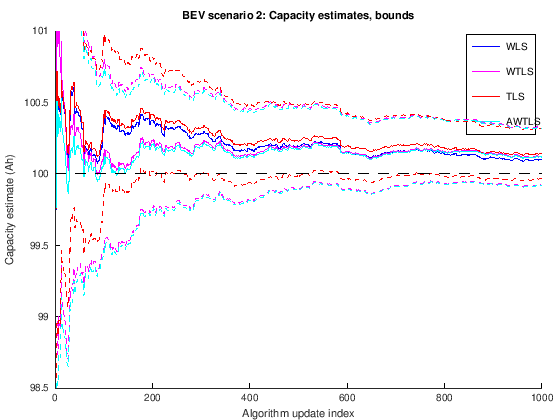

In [2]:
% Specific setup for BEV case 2
Q0 = 100;
maxI = 5*Q0;      % must be able to measure current up to +/- maxI
precisionI = 1024; % 10-bit precision on current sensor
slope = 0;
Qnom = 0.99*Q0;
xmax = 0.8;
xmin = -xmax;
theCase = 2; % random-length drive cycles!
mode = 0.5; sigma = 0.6; 
socnoise = 0.01; % lower noise since we know one endpoint exactly
gamma = 1;
plotTitle = 'BEV scenario 2';

% YOU MUST NOT CHANGE THE FOLLOWING LINE IN ORDER TO ARRIVE AT "CORRECT" ANSWERS 
% FOR THE QUIZ. IF YOU CHANGE IT TO EXPLORE THE BEHAVIOR OF THE XLS METHODS FOR 
% DIFFERENT PSEUDO-RANDOM SEQUENCES, CHANGE IT BACK TO rand("seed",3); randn("seed",3); 
% BEFORE COMPUTING RESULTS TO ENTER AS QUIZ RESPONSES.
rand("seed",3); randn("seed",3);

% The remainder of this Jupyter notebook cell is the script "runScenario.m"
n = 1000;                           % number of data points collected
Q = (Q0+slope*(1:n))';              % evolution of true capacity over time
x = ((xmax-xmin)*rand(n,1)+xmin);   % true x(i), without noise
y = Q.*x;                           % true y(i), without noise

binsize = 2*maxI/precisionI;        % resolution of current sensor
rn1 = ones(n,1);                    % init std. dev. for each measurement
sx = socnoise*rn1;                  % scale Gaussian std. dev.
if theCase == 1,                    % the typical case (true for HEV case 1)
  rn2 = rn1;                        % same scale on y(i) as x(i) noise
  sy = binsize*sqrt(m/12)/3600*rn2; % std. dev. for y(i)
else % this case will be discussed for BEV case 3
  mu = log(mode)+sigma^2;   
  m = 3600*lognrnd(mu,sigma,n,1);   
  sy = binsize*sqrt(m/12)/3600;     % std.dev. for y(i)
end

x = x + sx.*randn(n,1);             % measured x(i) data, including noise
y = y + sy.*randn(n,1);             % measured y(i) data, including noise

% Execute the algorithms for BEV case 2
[QhatBEV2,SigmaQBEV2] = xLSalgos(x,y,sx.^2,sy.^2,gamma,Qnom,sy(1)^2);

% Plot estimates of capacity for BEV case 2
hold on; Qhat = QhatBEV2; SigmaQ = SigmaQBEV2;
plot(Qhat(:,1),'b','linewidth',3); % WLS
plot(Qhat(:,2),'m','linewidth',3); % WTLS
plot(Qhat(:,3),'r','linewidth',3); % TLS
plot(Qhat(:,4),'c','linewidth',3); % AWTLS

xlabel('Algorithm update index');
ylabel('Capacity estimate (Ah)');
title(sprintf('%s: Capacity estimates, bounds',plotTitle));
legend('WLS','WTLS','TLS','AWTLS','location','northeast');

% Plot 3-sigma bounds
plot(Qhat(:,1)+3*sqrt(SigmaQ(:,1)),'b--','linewidth',0.5);
plot(Qhat(:,2)+3*sqrt(SigmaQ(:,2)),'m--','linewidth',0.5);
plot(Qhat(:,3)+3*sqrt(SigmaQ(:,3)),'r--','linewidth',0.5);
plot(Qhat(:,4)+3*sqrt(SigmaQ(:,4)),'c--','linewidth',0.5);
plot(Qhat(:,1)-3*sqrt(SigmaQ(:,1)),'b--','linewidth',0.5);
plot(Qhat(:,2)-3*sqrt(SigmaQ(:,2)),'m--','linewidth',0.5);
plot(Qhat(:,3)-3*sqrt(SigmaQ(:,3)),'r--','linewidth',0.5);
plot(Qhat(:,4)-3*sqrt(SigmaQ(:,4)),'c--','linewidth',0.5);

% Plot over top to make sure estimate is on top of bounds
plot(Qhat(:,1),'b','linewidth',3); % WLS
plot(Qhat(:,2),'m','linewidth',3); % WTLS
plot(Qhat(:,3),'r','linewidth',3); % TLS
plot(Qhat(:,4),'c','linewidth',3); % AWTLS

% Plot true capacity
plot(1:length(x),Q,'k--','linewidth',1);  ylim([98.5 101]);

In [3]:
% Compute fraction of time estimates are OUTSIDE bounds
errWLS       = Q - QhatBEV2(:,1);   bndWLS = 3*sqrt(SigmaQBEV2(:,1)); 
errWTLS      = Q - QhatBEV2(:,2);  bndWTLS = 3*sqrt(SigmaQBEV2(:,2));
errTLS       = Q - QhatBEV2(:,3);   bndTLS = 3*sqrt(SigmaQBEV2(:,3));
errAWTLS     = Q - QhatBEV2(:,4); bndAWTLS = 3*sqrt(SigmaQBEV2(:,4));
percentWLS   = length(find(abs(errWLS)>bndWLS))/length(Q)*100
percentWTLS  = length(find(abs(errWTLS)>bndWTLS))/length(Q)*100
percentTLS   = length(find(abs(errTLS)>bndTLS))/length(Q)*100
percentAWTLS = length(find(abs(errAWTLS)>bndAWTLS))/length(Q)*100

percentWLS =  100
percentWTLS = 0
percentTLS =  17.100
percentAWTLS = 0


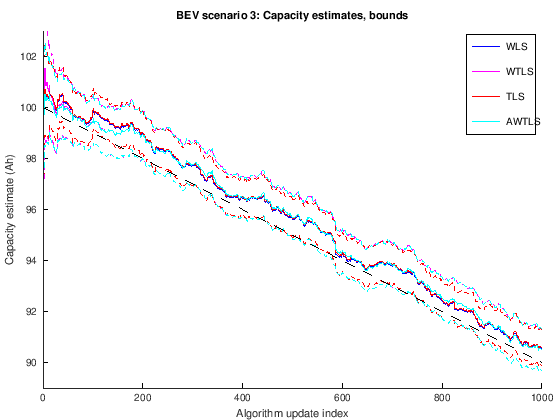

In [4]:
% Specific setup for BEV case 3
Q0 = 100;
maxI = 5*Q0;      % must be able to measure current up to +/- maxI
precisionI = 1024; % 10-bit precision on current sensor
slope = -0.01;
Qnom = 0.99*Q0;
xmax = 0.8;
xmin = -xmax;
theCase = 2; % random-length drive cycles!
mode = 0.5; sigma = 0.6; 
socnoise = 0.01; % lower noise since we know one endpoint exactly
gamma = 0.98;
plotTitle = 'BEV scenario 3';

% YOU MUST NOT CHANGE THE FOLLOWING LINE IN ORDER TO ARRIVE AT "CORRECT" ANSWERS 
% FOR THE QUIZ. IF YOU CHANGE IT TO EXPLORE THE BEHAVIOR OF THE XLS METHODS FOR 
% DIFFERENT PSEUDO-RANDOM SEQUENCES, CHANGE IT BACK TO rand("seed",3); randn("seed",3); 
% BEFORE COMPUTING RESULTS TO ENTER AS QUIZ RESPONSES.
rand("seed",3); randn("seed",3);

% The remainder of this Jupyter notebook cell is the script "runScenario.m"
n = 1000;                           % number of data points collected
Q = (Q0+slope*(1:n))';              % evolution of true capacity over time
x = ((xmax-xmin)*rand(n,1)+xmin);   % true x(i), without noise
y = Q.*x;                           % true y(i), without noise

binsize = 2*maxI/precisionI;        % resolution of current sensor
rn1 = ones(n,1);                    % init std. dev. for each measurement
sx = socnoise*rn1;                  % scale Gaussian std. dev.
if theCase == 1,                    % the typical case (true for HEV case 1)
  rn2 = rn1;                        % same scale on y(i) as x(i) noise
  sy = binsize*sqrt(m/12)/3600*rn2; % std. dev. for y(i)
else % this case will be discussed for BEV case 3
  mu = log(mode)+sigma^2;   
  m = 3600*lognrnd(mu,sigma,n,1);   
  sy = binsize*sqrt(m/12)/3600;     % std.dev. for y(i)
end

x = x + sx.*randn(n,1);             % measured x(i) data, including noise
y = y + sy.*randn(n,1);             % measured y(i) data, including noise

% Execute the algorithms for BEV case 3
[QhatBEV3,SigmaQBEV3] = xLSalgos(x,y,sx.^2,sy.^2,gamma,Qnom,sy(1)^2);

% Plot estimates of capacity for BEV case 3
hold on; Qhat = QhatBEV3; SigmaQ = SigmaQBEV3;
plot(Qhat(:,1),'b','linewidth',3); % WLS
plot(Qhat(:,2),'m','linewidth',3); % WTLS
plot(Qhat(:,3),'r','linewidth',3); % TLS
plot(Qhat(:,4),'c','linewidth',3); % AWTLS

xlabel('Algorithm update index');
ylabel('Capacity estimate (Ah)');
title(sprintf('%s: Capacity estimates, bounds',plotTitle));
legend('WLS','WTLS','TLS','AWTLS','location','northeast');

% Plot 3-sigma bounds
plot(Qhat(:,1)+3*sqrt(SigmaQ(:,1)),'b--','linewidth',0.5);
plot(Qhat(:,2)+3*sqrt(SigmaQ(:,2)),'m--','linewidth',0.5);
plot(Qhat(:,3)+3*sqrt(SigmaQ(:,3)),'r--','linewidth',0.5);
plot(Qhat(:,4)+3*sqrt(SigmaQ(:,4)),'c--','linewidth',0.5);
plot(Qhat(:,1)-3*sqrt(SigmaQ(:,1)),'b--','linewidth',0.5);
plot(Qhat(:,2)-3*sqrt(SigmaQ(:,2)),'m--','linewidth',0.5);
plot(Qhat(:,3)-3*sqrt(SigmaQ(:,3)),'r--','linewidth',0.5);
plot(Qhat(:,4)-3*sqrt(SigmaQ(:,4)),'c--','linewidth',0.5);

% Plot over top to make sure estimate is on top of bounds
plot(Qhat(:,1),'b','linewidth',3); % WLS
plot(Qhat(:,2),'m','linewidth',3); % WTLS
plot(Qhat(:,3),'r','linewidth',3); % TLS
plot(Qhat(:,4),'c','linewidth',3); % AWTLS

% Plot true capacity
plot(1:length(x),Q,'k--','linewidth',1);  ylim([89 103]);

In [5]:
% Compute RMS estimation error for all methods
errWLS   = Q - QhatBEV3(:,1); rmsErrWLS = sqrt(mean(errWLS.^2))
errWTLS  = Q - QhatBEV3(:,2); rmsErrWTLS = sqrt(mean(errWTLS.^2))
errTLS   = Q - QhatBEV3(:,3); rmsErrTLS = sqrt(mean(errTLS.^2))
errAWTLS = Q - QhatBEV3(:,4); rmsErrAWTLS = sqrt(mean(errAWTLS.^2))

rmsErrWLS =  0.61079
rmsErrWTLS =  0.63138
rmsErrTLS =  0.64886
rmsErrAWTLS =  0.61758
